In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Local application imports
from xai_compare.consistency import consistency_measurement

In [3]:
# Load the dataset into a DataFrame
df = pd.read_csv('data/diabetes/diabetes.csv')

# Separate the features (X) and the target variable (y)
X = df.iloc[:, :-1]
y = df.Outcome

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

Processing folds: 100%|██████████| 5/5 [00:23<00:00,  4.71s/it]


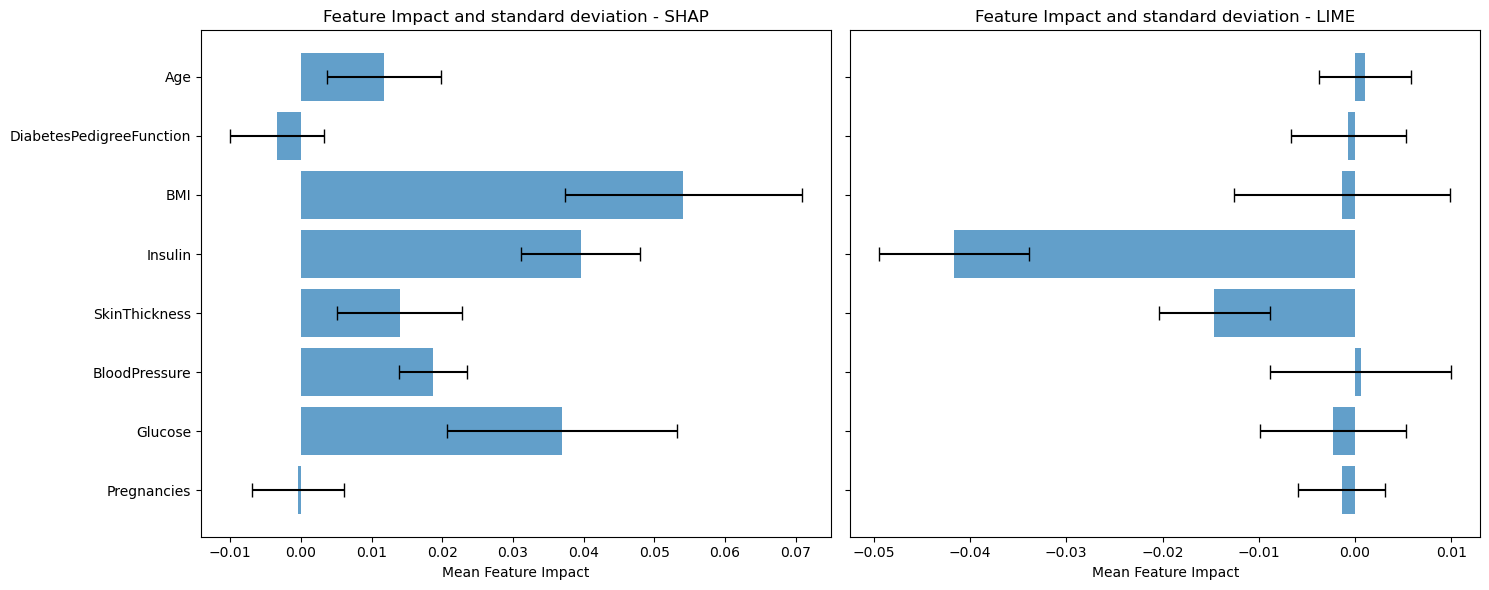

,min_std,max_std,mean_std,median_std
shap,0.004858,0.016778,0.009555,0.008247
lime,0.004510,0.011188,0.007130,0.006771


In [5]:
# Measure the consistency of feature explanations using SHAP and LIME
consistency_scores = consistency_measurement(X, y, model, n_splits=5, explainers=['shap', 'lime'], verbose=False)

# Display the final scores DataFrame
consistency_scores